In [106]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch12. 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도 시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. Pandas 내부에 포함되어 있음
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능. groupby 기능을 추가한 라이브러리
# 1. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1. 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 한글 기본 설정(windows)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning 안 보이게 하는 설정
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지가 안 보이게 됨

## 1.2.그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그래프 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장 <br>

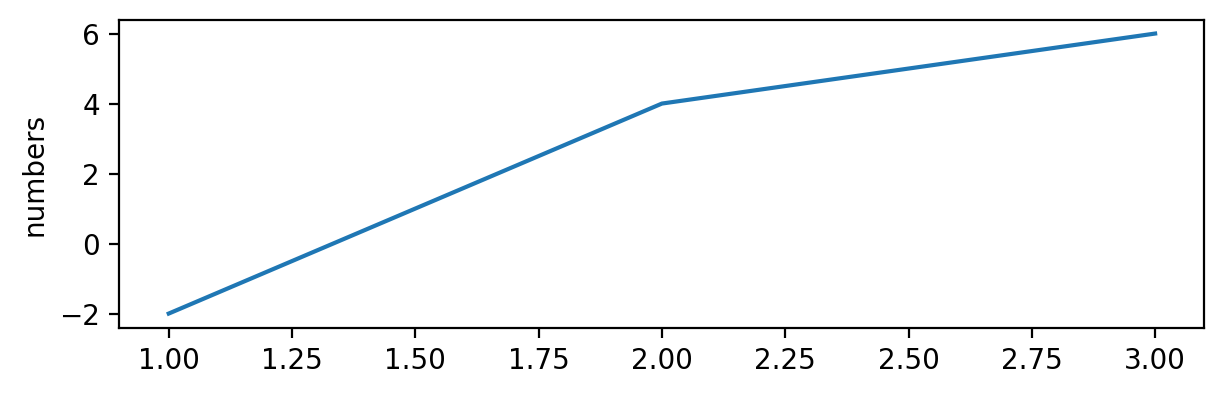

In [8]:
x = [1,2,3] #1) 데이터 준비
y = [-2,4,6]
plt.figure(figsize=(7, 2)) #2) 그래프 객체 생성하고 사이즈는 인치
plt.plot(x, y) #3) 그래프 그리기
plt.ylabel('numbers') #4) 커스터마이징
#plt.show() #5) 출력
plt.savefig('data/ch12.png', bbox_inches='tight') # 파일 출력

## 1.3.그래프 영역 나누기
### 1) subplot 함수로 subplot 추가

In [12]:
import numpy as np
x = np.arange(0,10,0.1) # x = np.linspace(0, 9.9, 100)
x.shape

(100,)

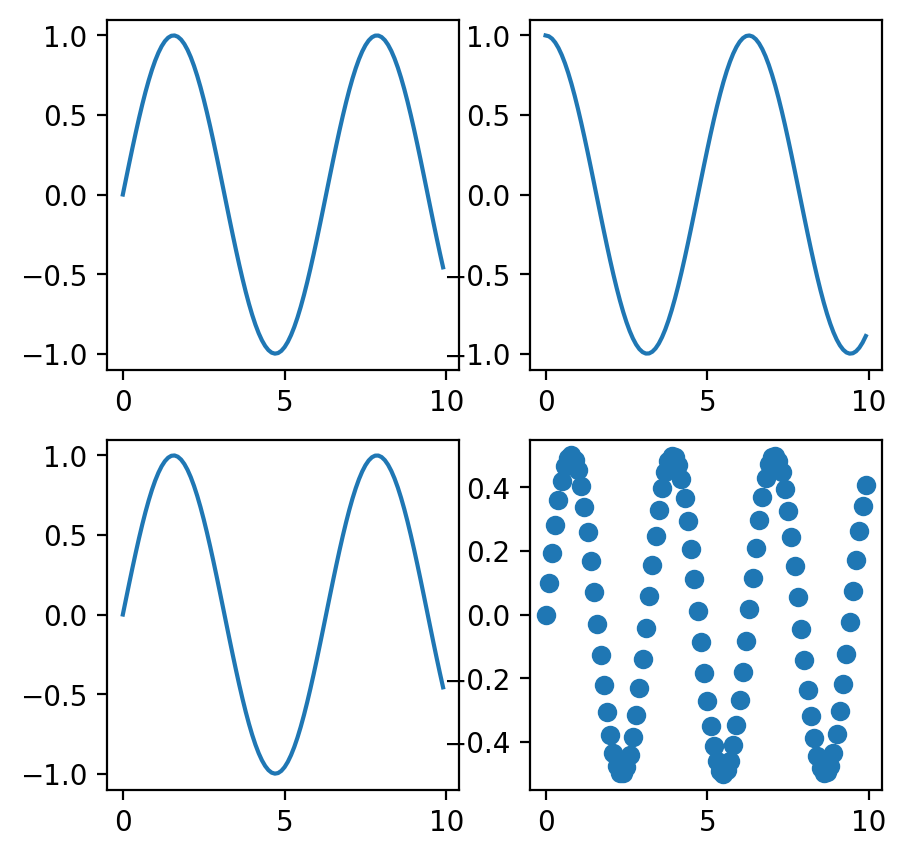

In [16]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1) #2행 1열로 만드는 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x)) # 선 그래프
plt.subplot(2,2,2) # 2행 2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(2,2,3)
plt.plot(x, np.sin(x))
plt.subplot(224) # 2행 2열 subplot 중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x)) # 점 그래프
plt.show()

### 2) subplots() 함수로 subplot 추가
- plot 함수에 색상이나 스타일을 조정(교안 14쪽)
- plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085

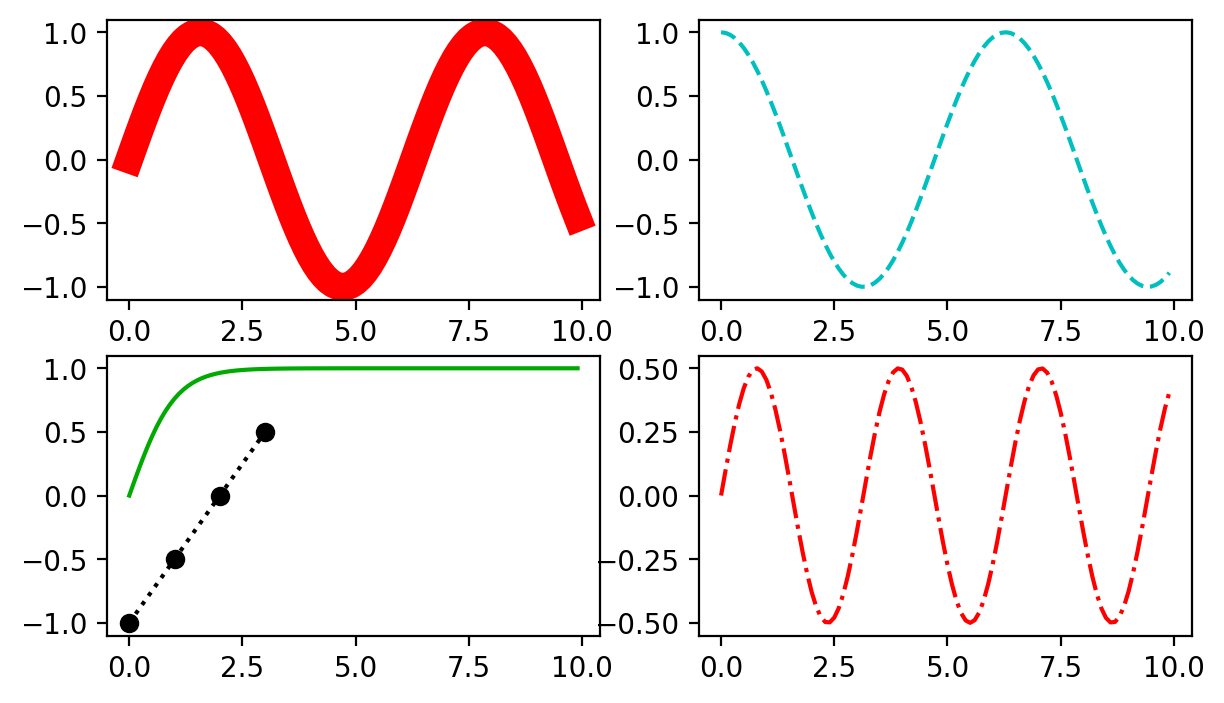

In [29]:
# 2행 2열의 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), c='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # c='c', linestyle= '--'
axes[1,0].plot(x, np.tanh(x), '#00AA00') 
axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') # k:black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

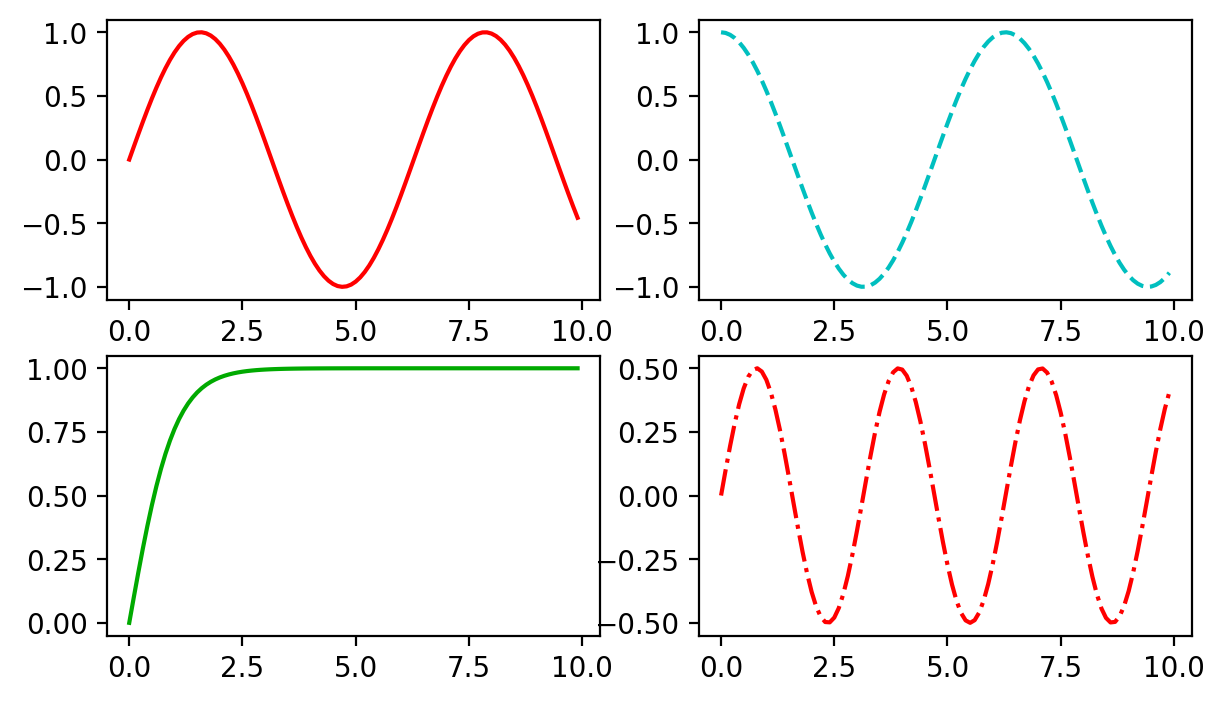

In [31]:
# 2행 2열 subplot (for문)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)] 
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(2,2,figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

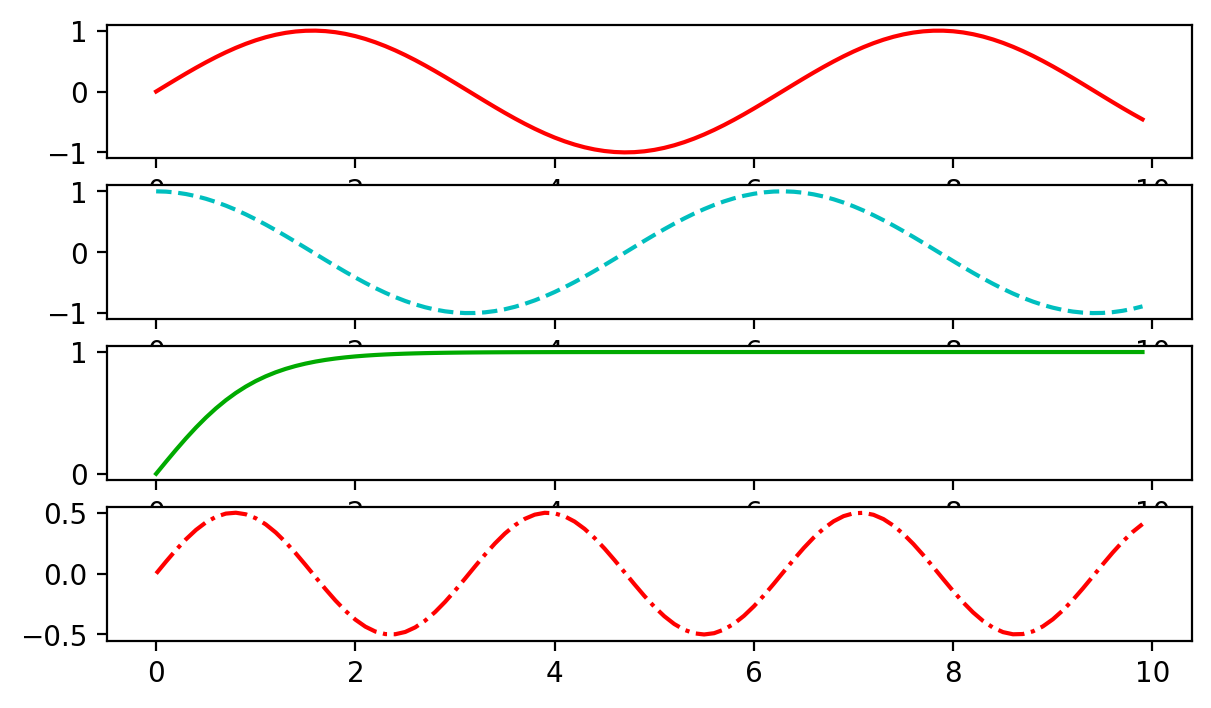

In [32]:
# 4행 1열 subplot (for문)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)] 
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(4,1,figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4.다양한 그래프 그리기
### 1) pyplot 함수들(교안 16쪽) : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() : 선 그래프
### 3) pandas.DataFrame.plot()
- plt.____(x, y, fmt)
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None)
    * kind : line(기본값), scatter(점도표), bar(막대그래프), barh(가로 막대그래프), density(밀도 그래프), hist(히스토그램), pie(한 컬럼만)....

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor


교안 21쪽
https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

<Figure size 800x200 with 0 Axes>

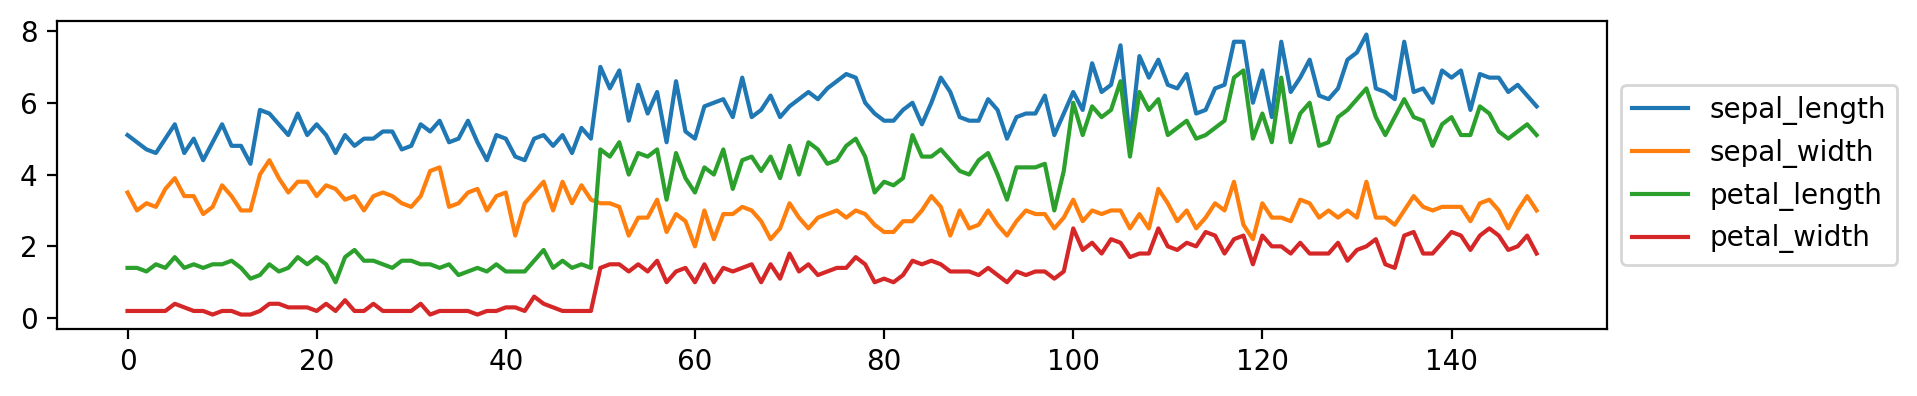

In [8]:
plt.figure(figsize=(8,2))
# plt.plot(iris.index, iris.iloc[:,:-1])
ax = iris.plot(kind='line', figsize=(10,2))
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

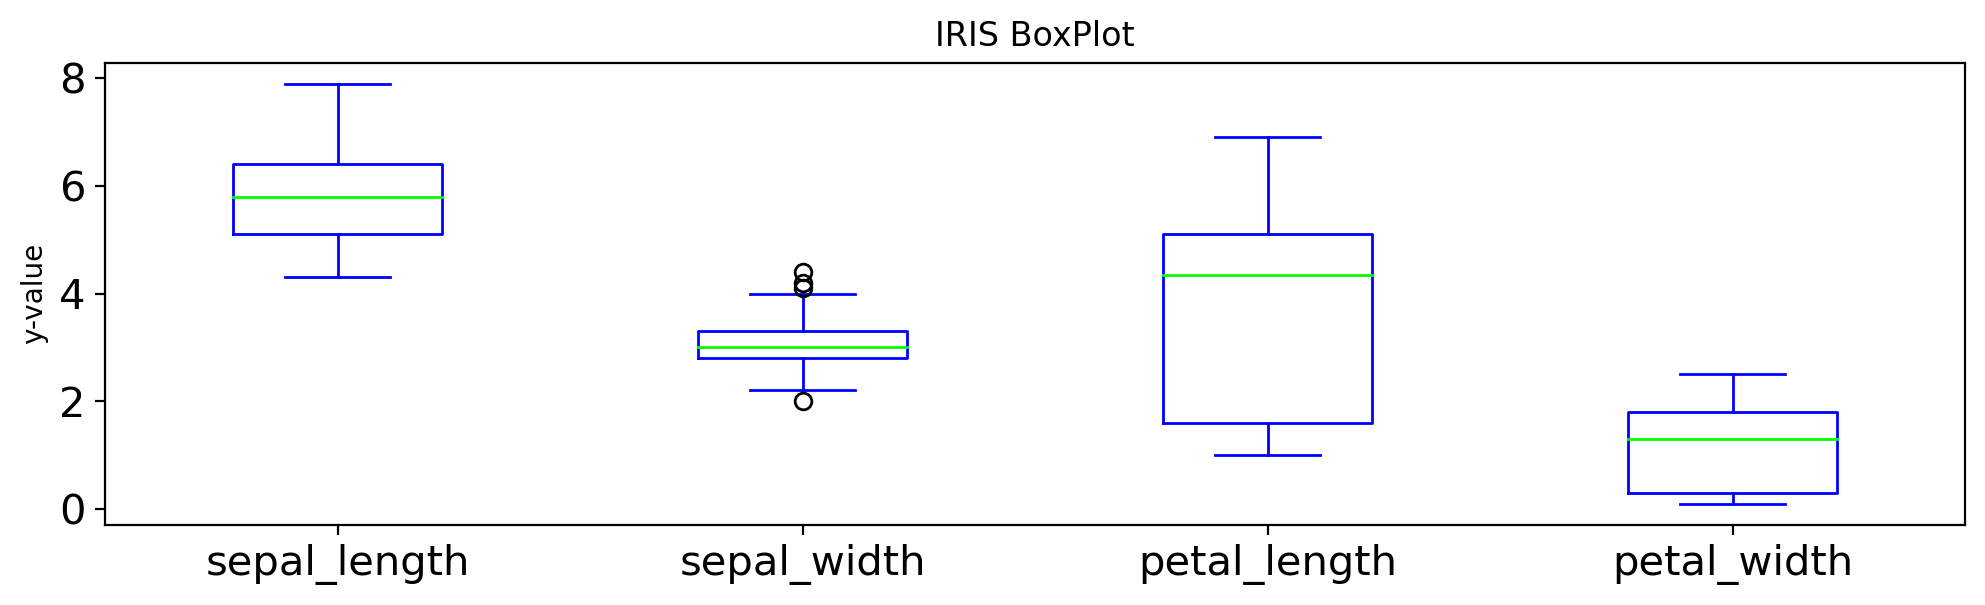

In [14]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot', ylabel='y-value', fontsize=15, colormap='brg')
plt.show()

교안 21쪽
https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

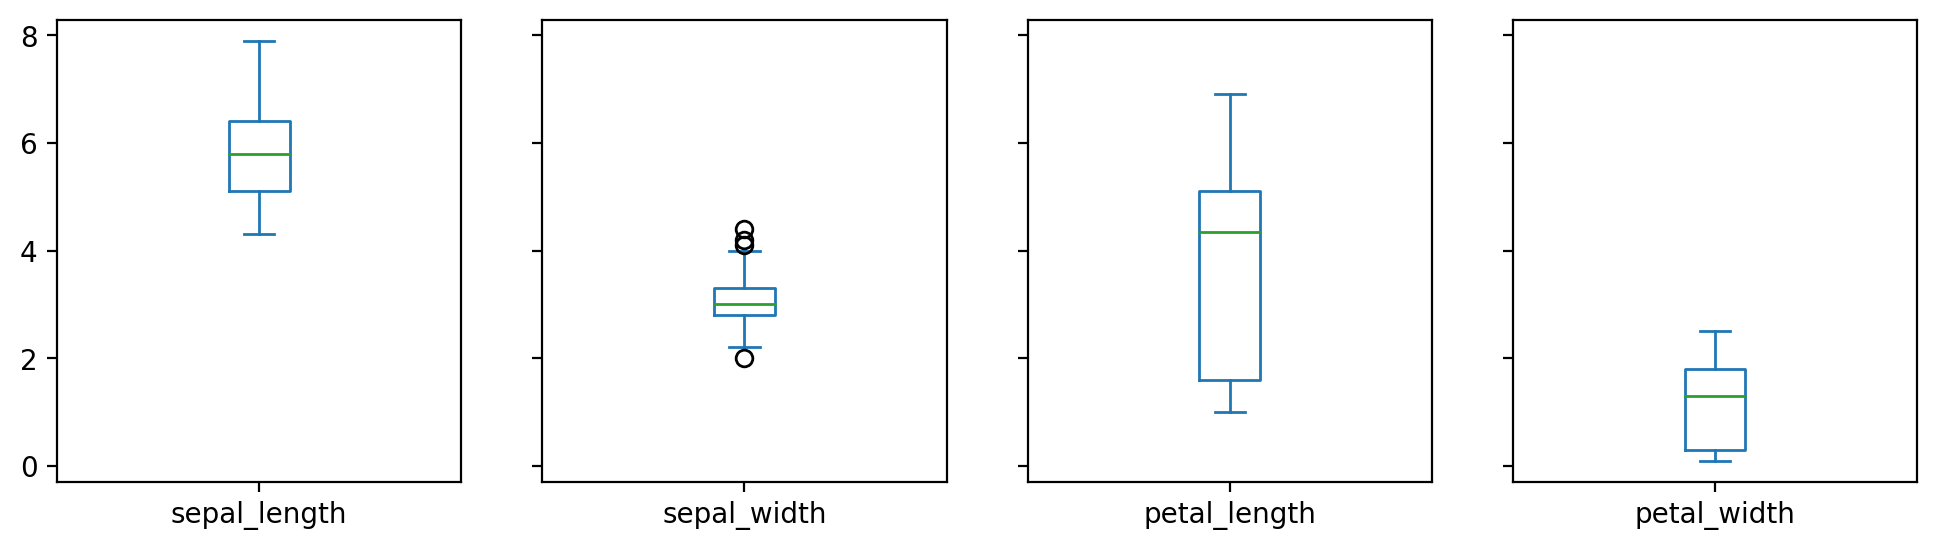

In [19]:
iris.plot(kind='box', figsize=(12,3), subplots=True, sharey=True)
plt.show()

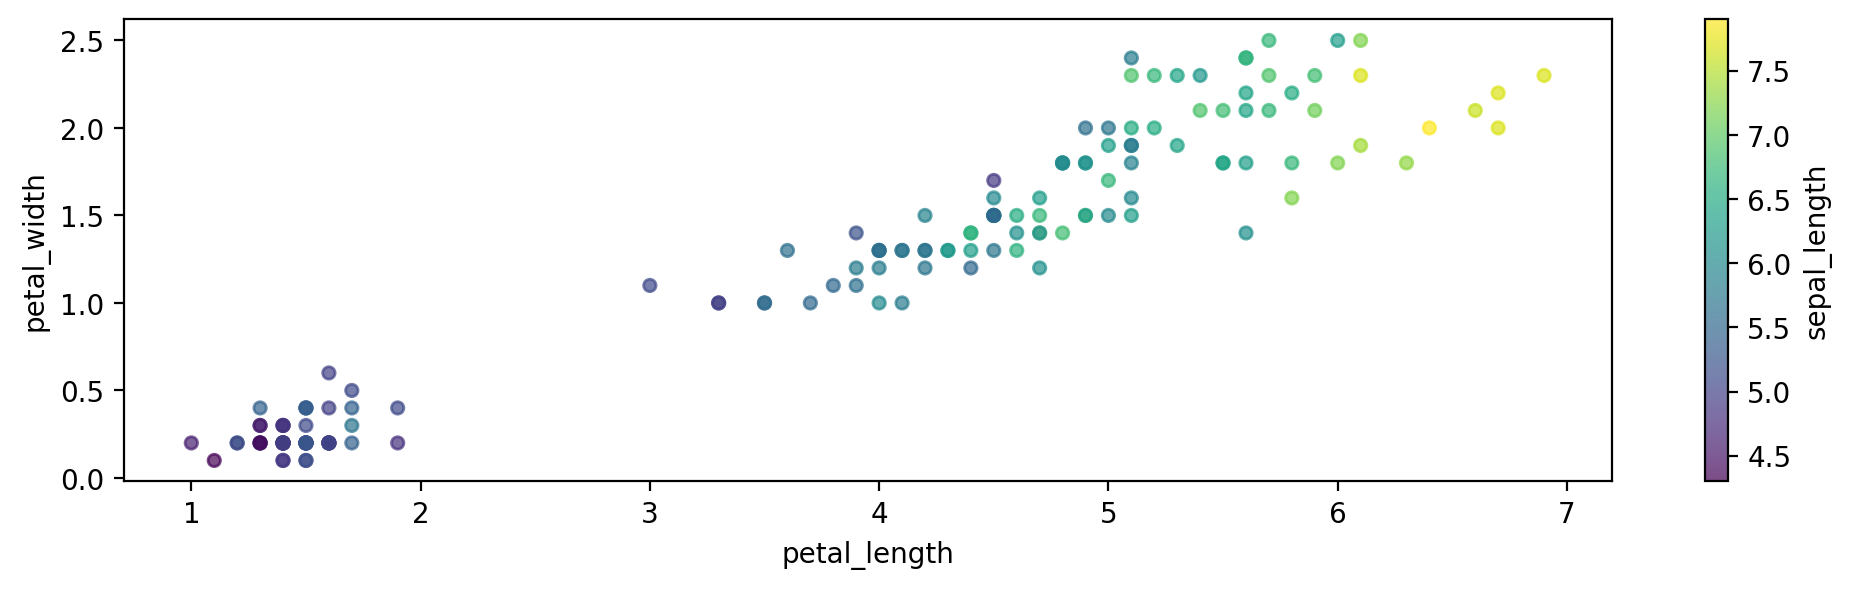

In [23]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3),
         c='sepal_length', alpha=0.7)
plt.show()

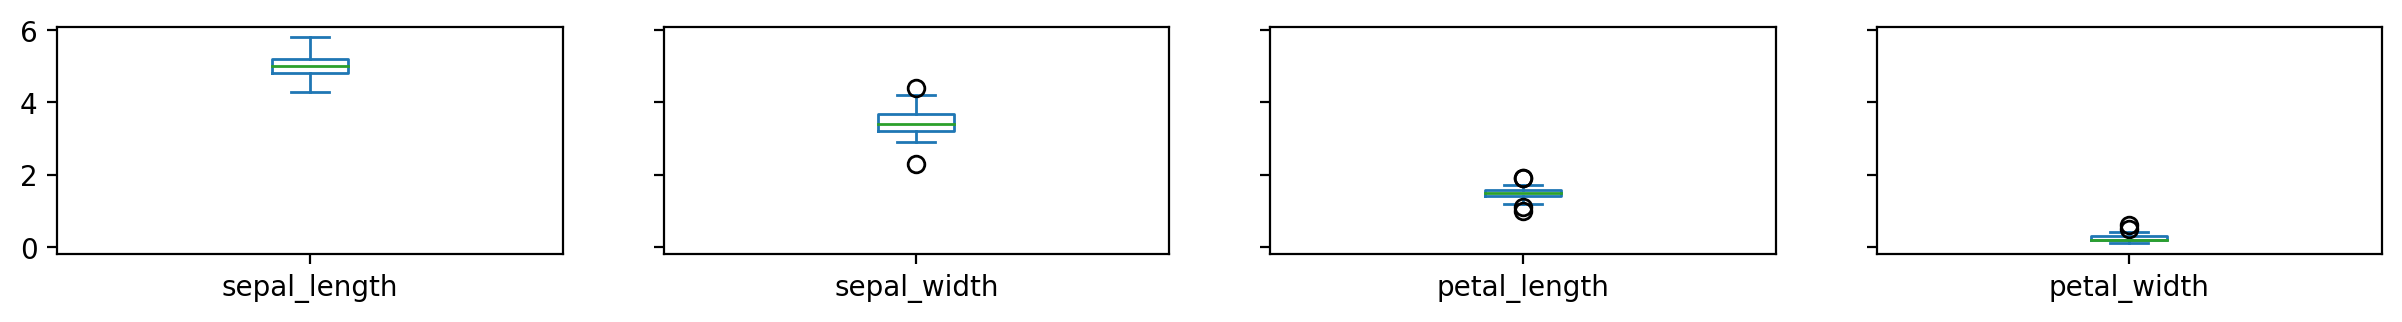

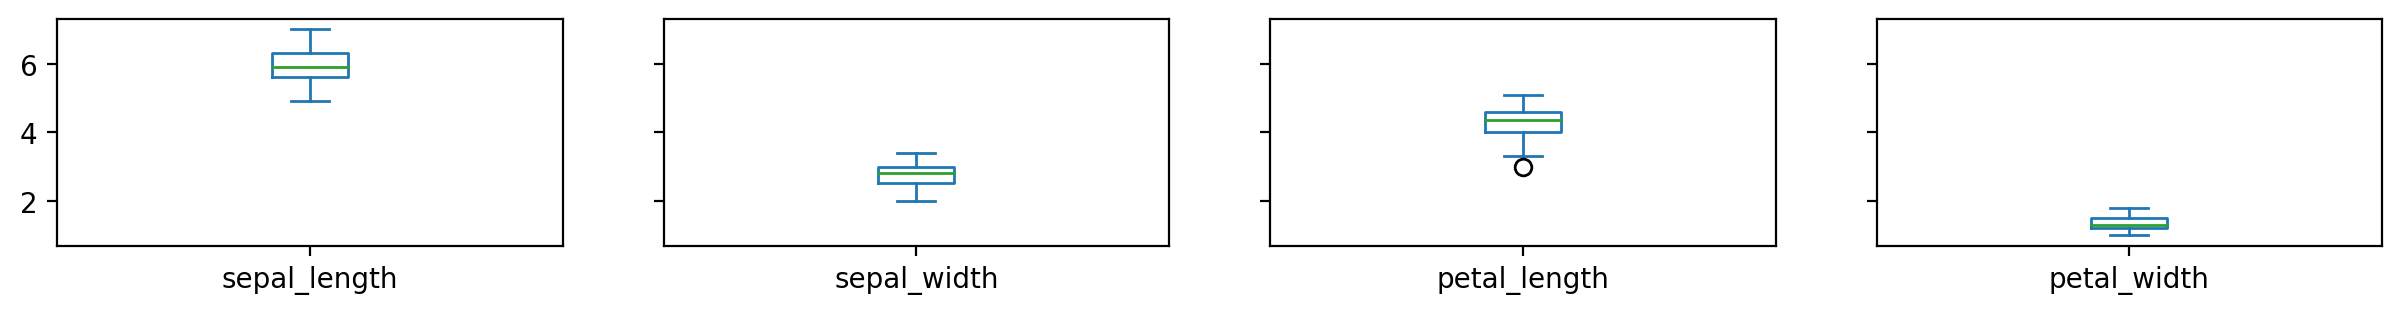

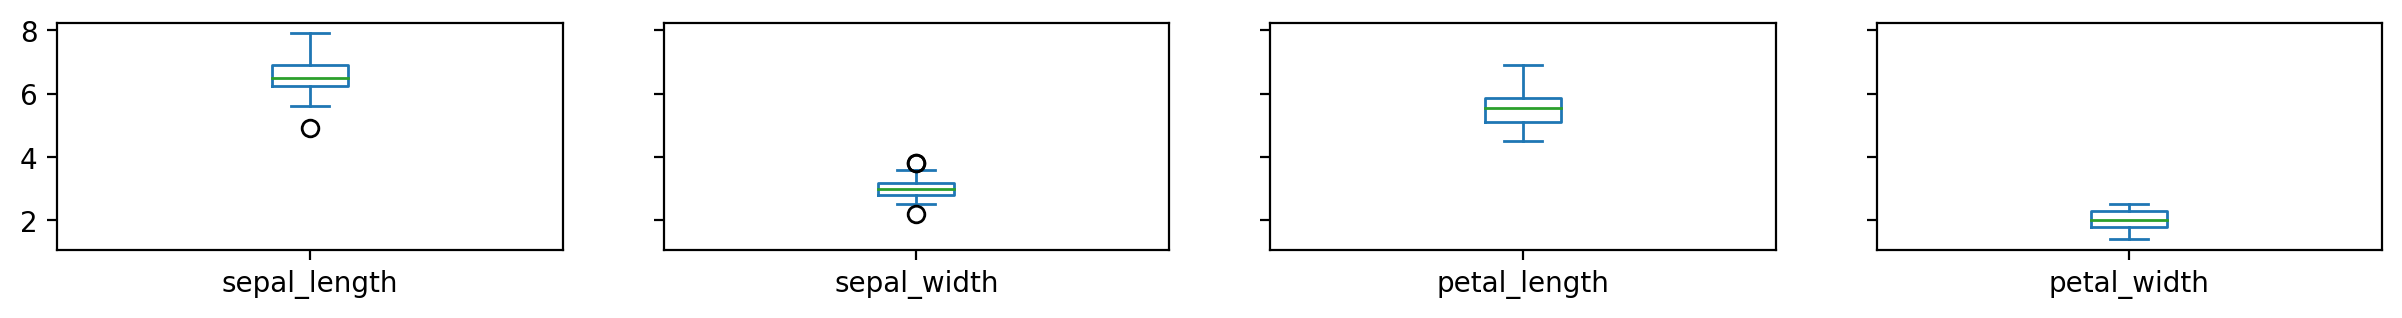

In [25]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', figsize=(15,5),
                            subplots=True, layout=(3,4), sharey=True)
plt.show()

## 4) plt.scatter() : 산점도

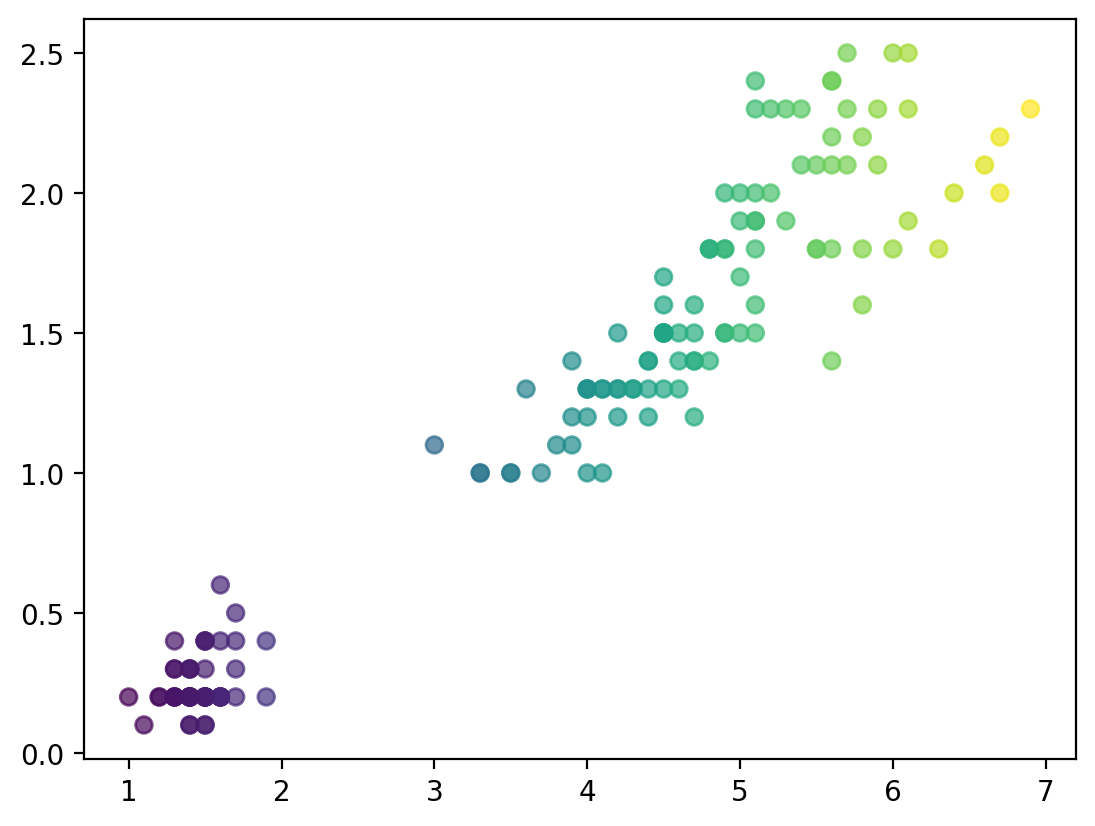

In [26]:
plt.scatter(iris.petal_length, iris.petal_width,
           c=iris.petal_length*20,
           alpha=0.7)

## 1.5.그 외 그래프 그리기
### 1) boxplot(분포를 알 수 없음) vs violinplt
교안 1쪽
- https://www.research.autodesk.com/publications/same-stats-different-graphs 동일한 통계, 다른 그래프

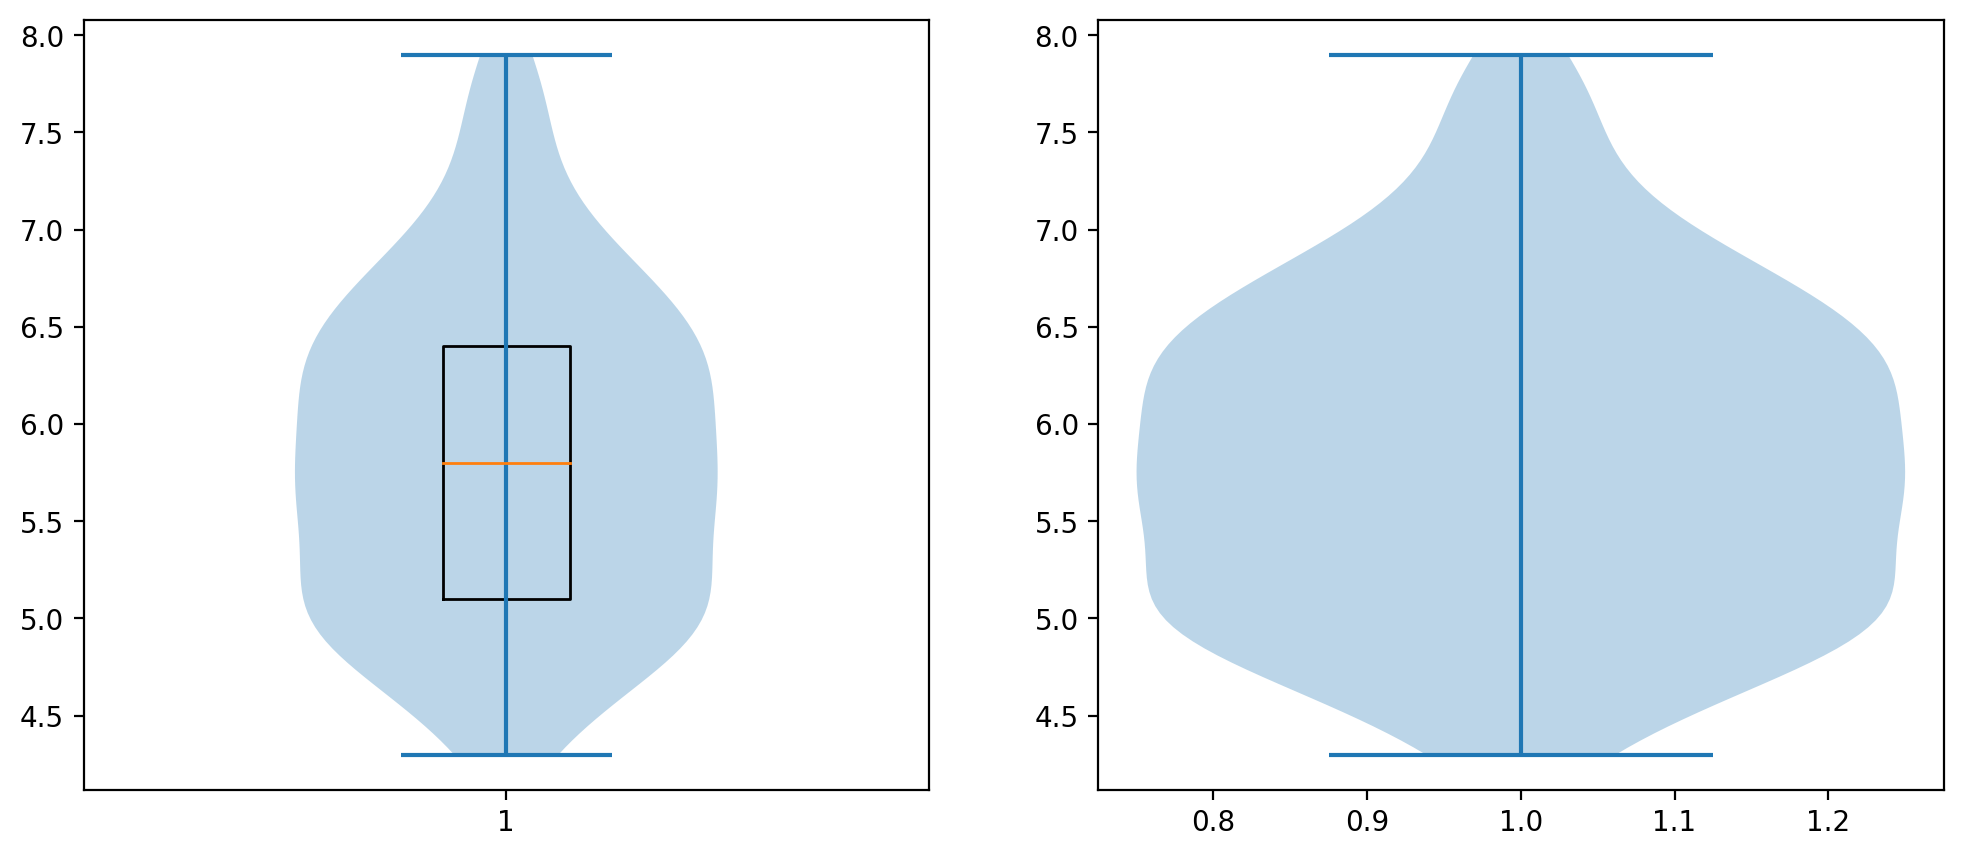

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 2) bar(), barh()

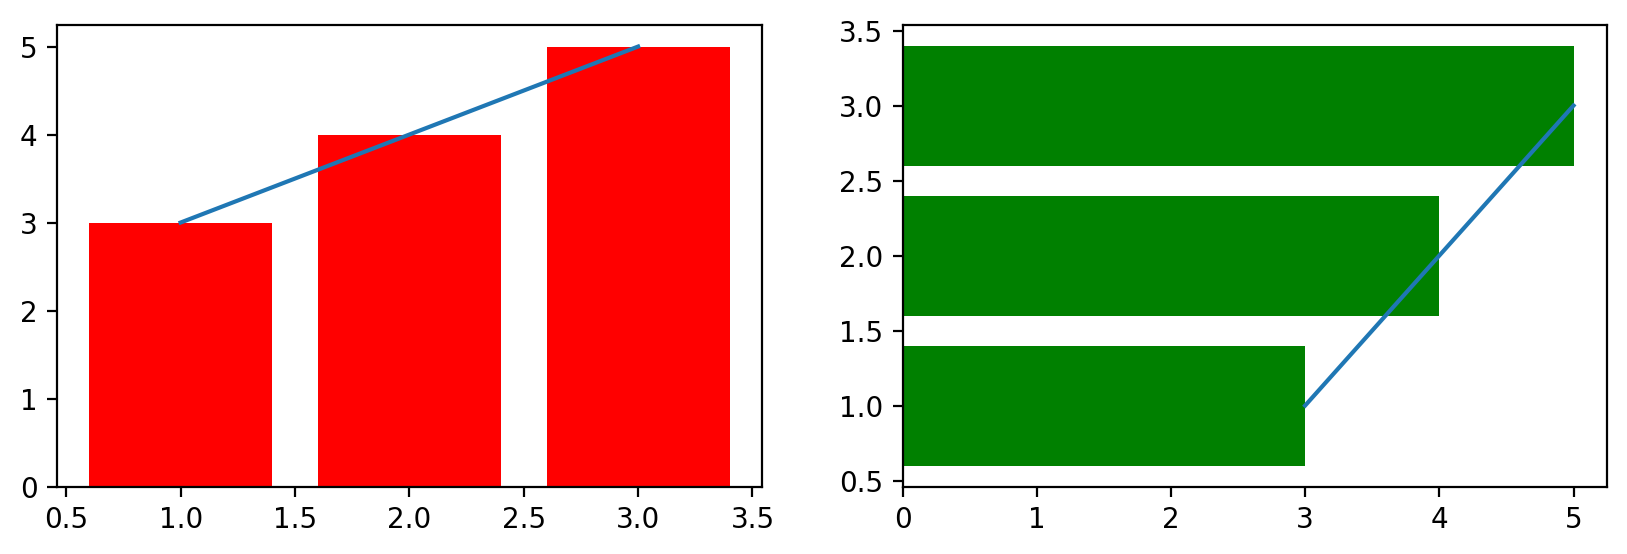

In [37]:
x = [1,2,3]
y = [3,4,5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color='g')
axes[1].plot(y, x)
plt.show()

### 3) hist(도수 분포표, 히스토그램) : 1차원 데이터만 나타낼 수 있음 (vgl. pie graph)

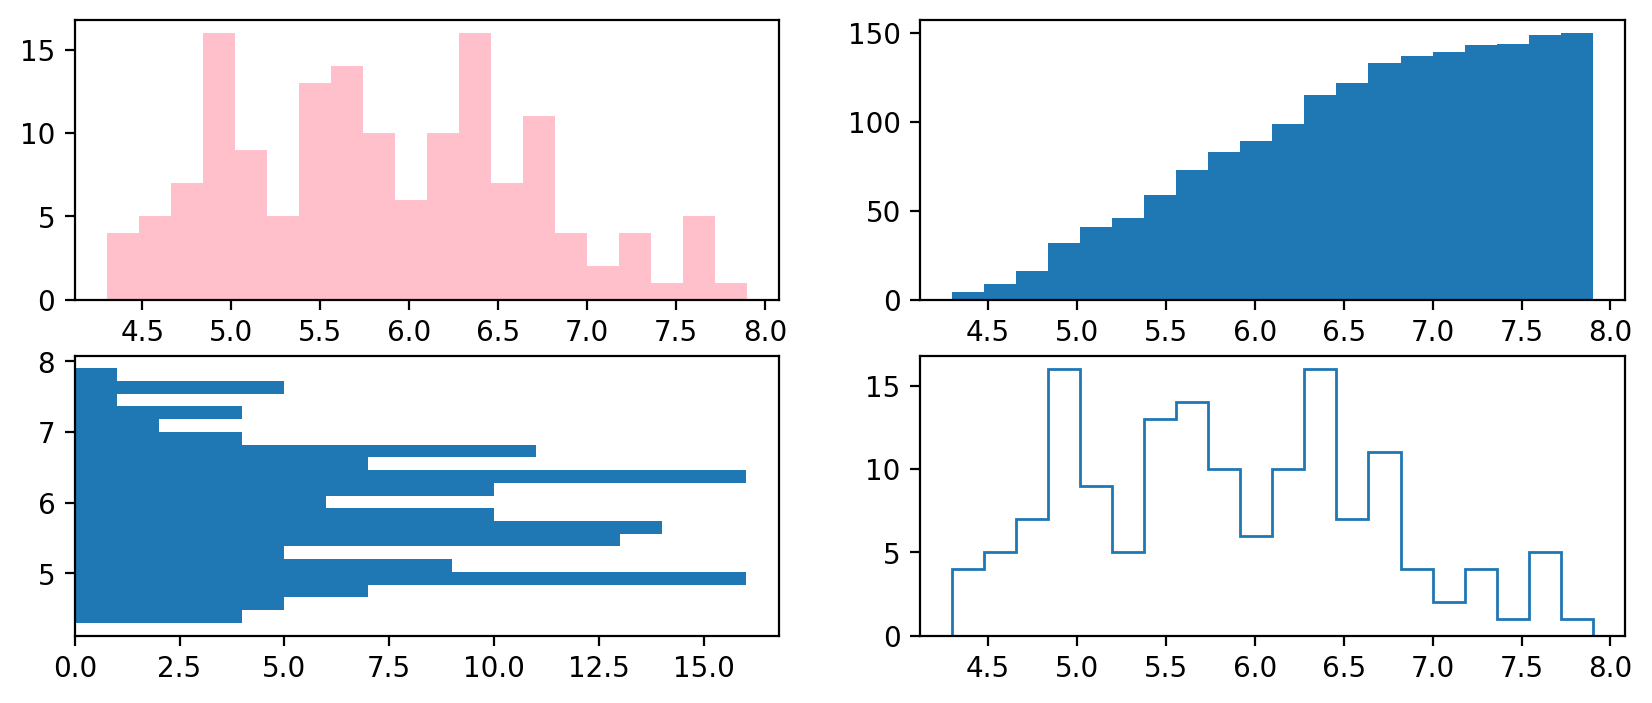

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes[0,0].hist(iris.sepal_length, bins=20, color='pink') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal')
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
# plt.hist?
plt.show()

### 4) axvline(), axhline(), fill(), fill_between()

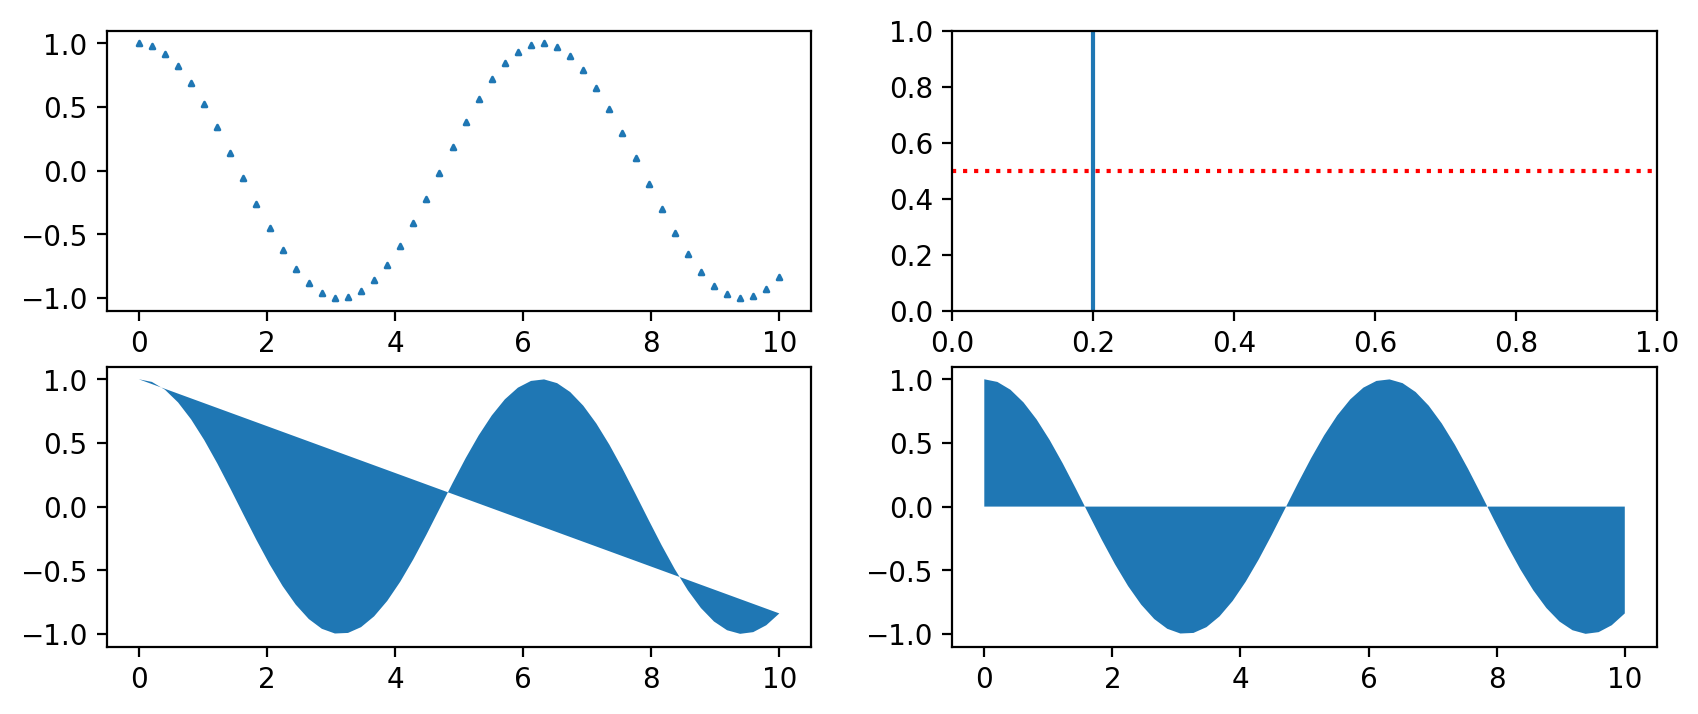

In [55]:
import numpy as np
x = np.linspace(0,10,50) # 50은 기본값
y = np.cos(x)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes[0,0].scatter(x,y, s=3, marker='^')
axes[0,1].axvline(0.2) # 수직선을 그리고 싶은 x축 값만 입력 가능
axes[0,1].axhline(0.5, color='r', linestyle=':') # 수직선을 그리고 싶은 y축 값만 입력 가능
axes[1,0].fill(x,y)
axes[1,1].fill_between(x,y)

### 5) pie chart
- 1차원 데이터만 나타낼 수 있음


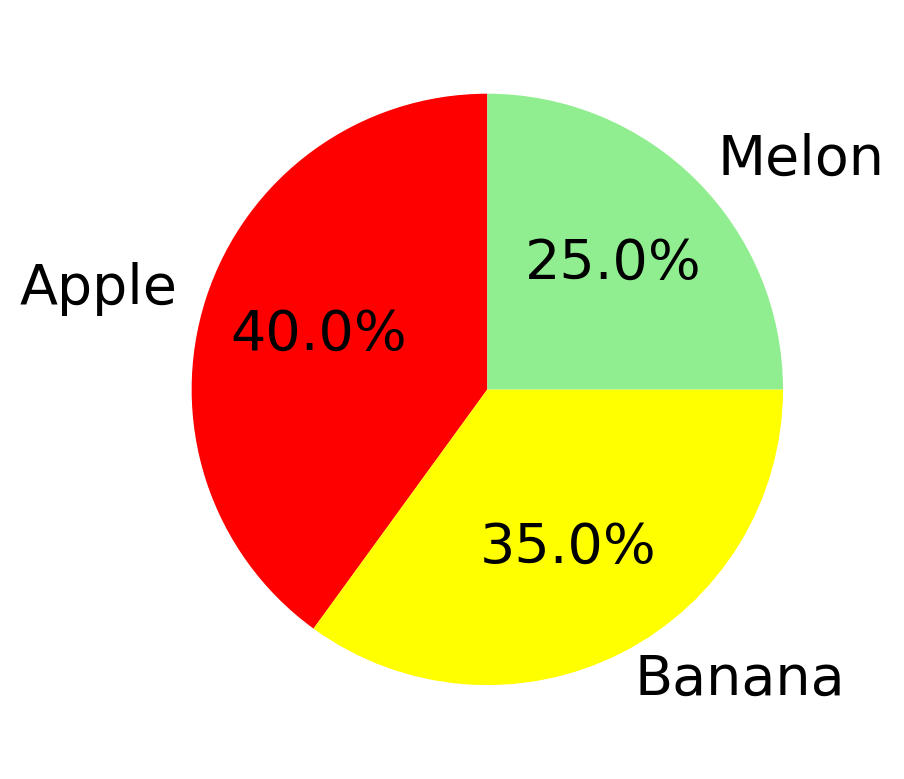

In [61]:
x = [40,35,25]
labels = ['Apple', 'Banana', 'Melon']
colors = ['red', 'yellow', 'lightgreen']
plt.pie(x, labels=labels, autopct='%.1f%%',
        startangle=90, colors=colors,
        textprops={'fontsize':20}) # autopct : percentage
plt.show()

## 1.6.그래프 커스터마이징
### 1) linestyle, linewidth, color, marker
### 2) text(), annotate()
참고: https://matplotlib.org/api/axes_api.html#text-and-annotations

In [67]:
# 한글 기본 폰트 설정 방법
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [70]:
# 한글 특정 폰트 설정 방법
from matplotlib.font_manager import FontProperties
font_file = r'C:\Windows\Fonts\H2GSRB.TTF' # 네이버 폰트, 구글 폰트 다운
font_prop = FontProperties(fname=font_file, size=15)

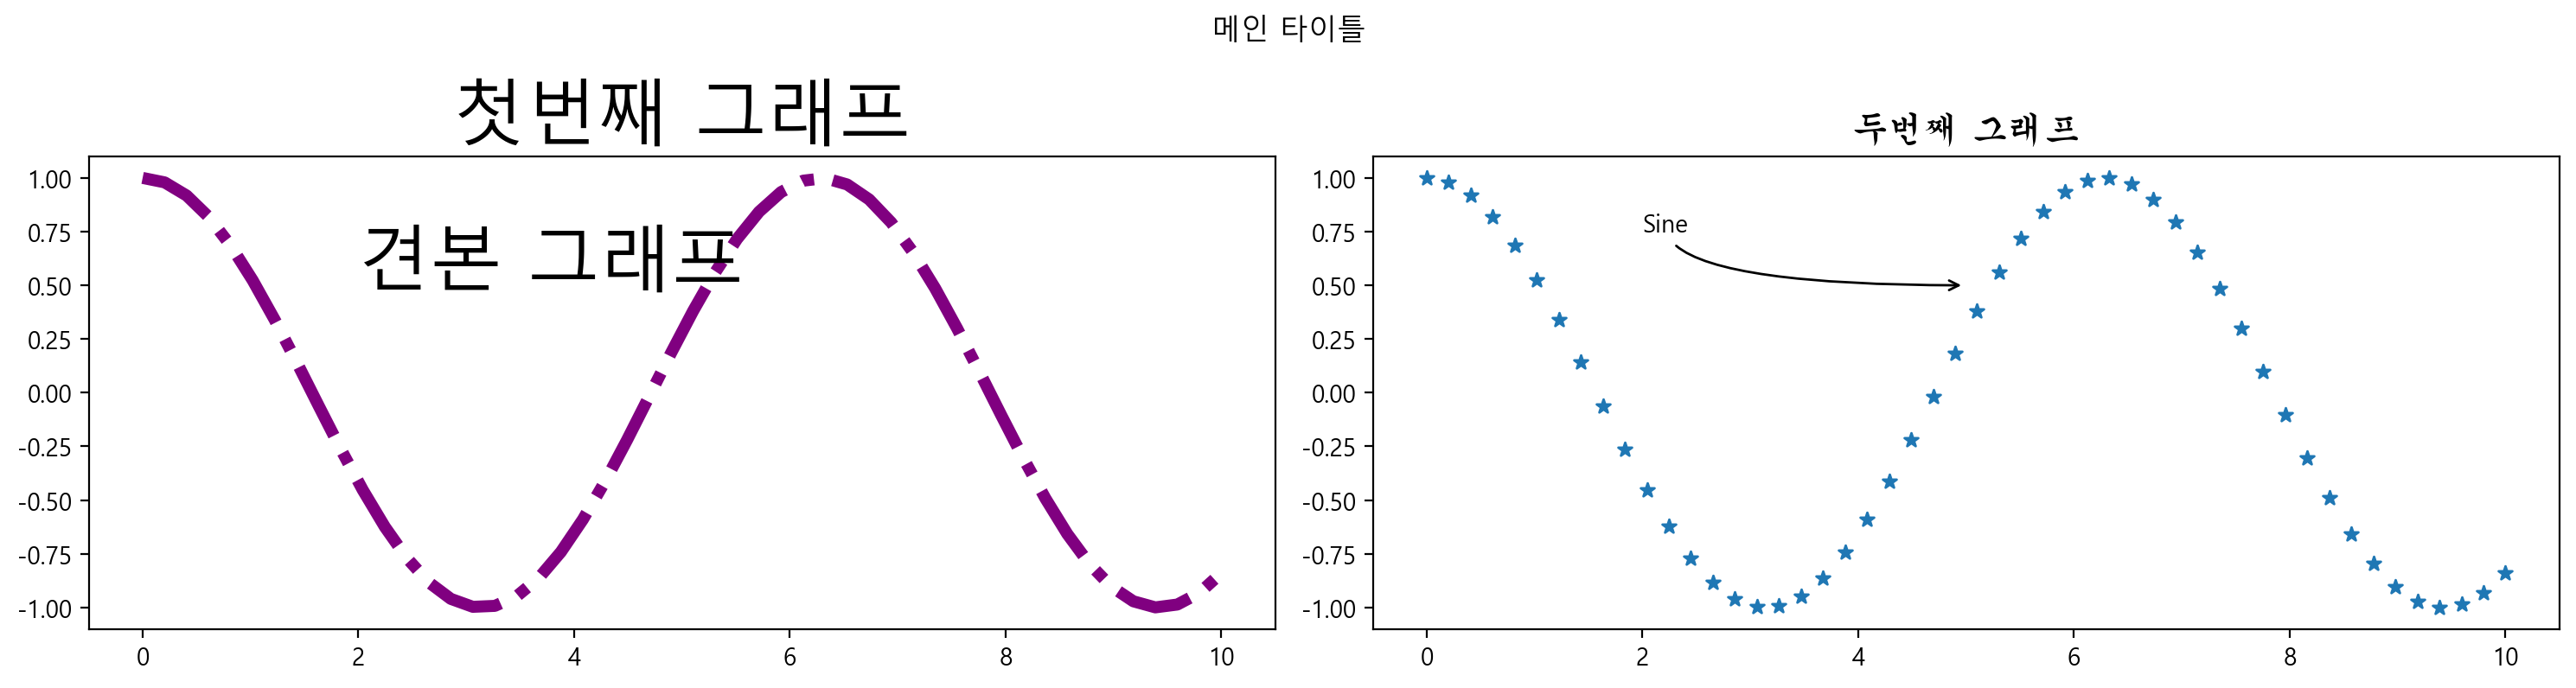

In [77]:
x = np.linspace(0, 10)
y = np.cos(x)
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
axes[0].plot(x,y, linewidth=5, linestyle='-.', color='purple')
axes[0].text(2, 0.5, '견본 그래프', fontsize=30)
axes[0].set_title('첫번째 그래프', fontsize=30)

axes[1].scatter(x,y, marker='*')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자와 글자가 있을 좌표
                xy=(5, 0.5),# 화살표가 가리킬 좌표
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='angle3')) # angle3, angle, arc
axes[1].set_title('두번째 그래프', fontproperties=font_prop)
plt.suptitle('메인 타이틀')
plt.tight_layout() # subplot layout 조정
plt.show()

### 3) 수학 기호
교안 30쪽
- 참고 : https://matplotlib.org/users/mathtext.html

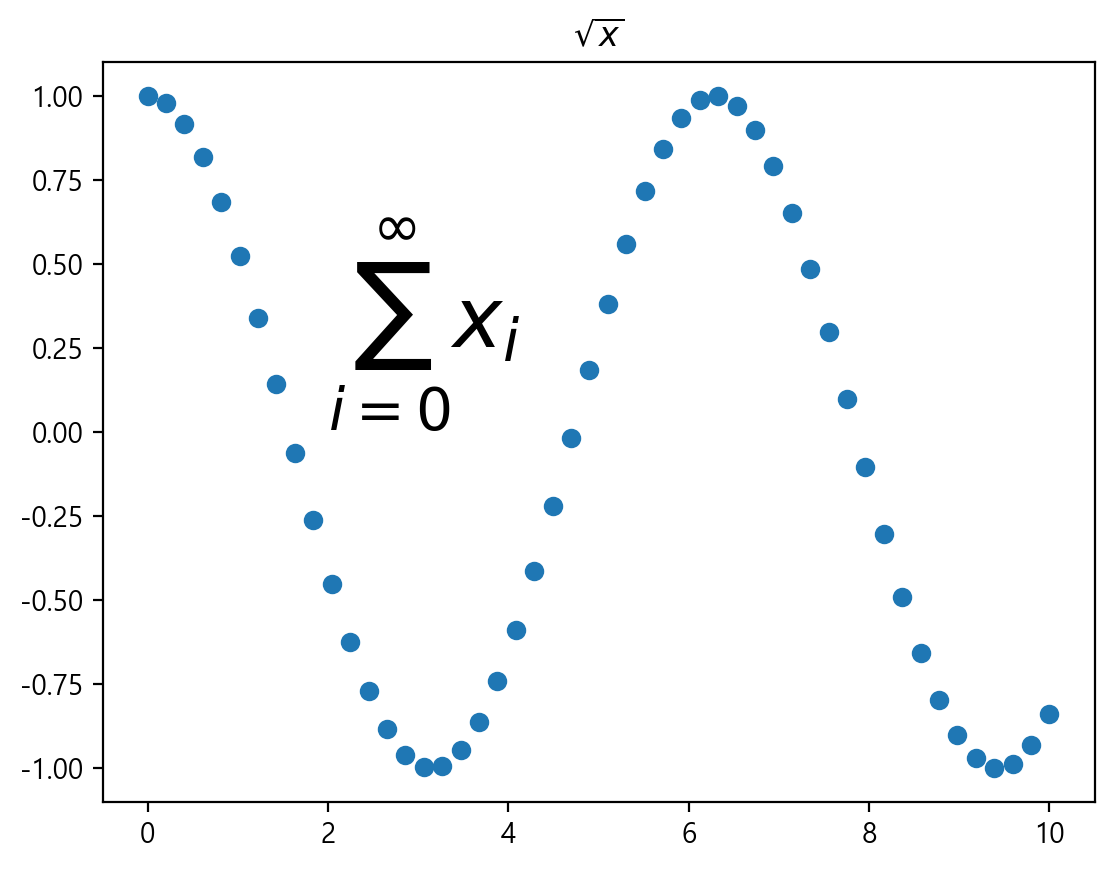

In [80]:
plt.scatter(x,y)
plt.text(2, 0.25, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.title(r'$\sqrt{x}$')
plt.show()

### 4) 축과 눈금 
교안 33쪽
- https://matplotlib.org/3.1.0/api/axis_api.html

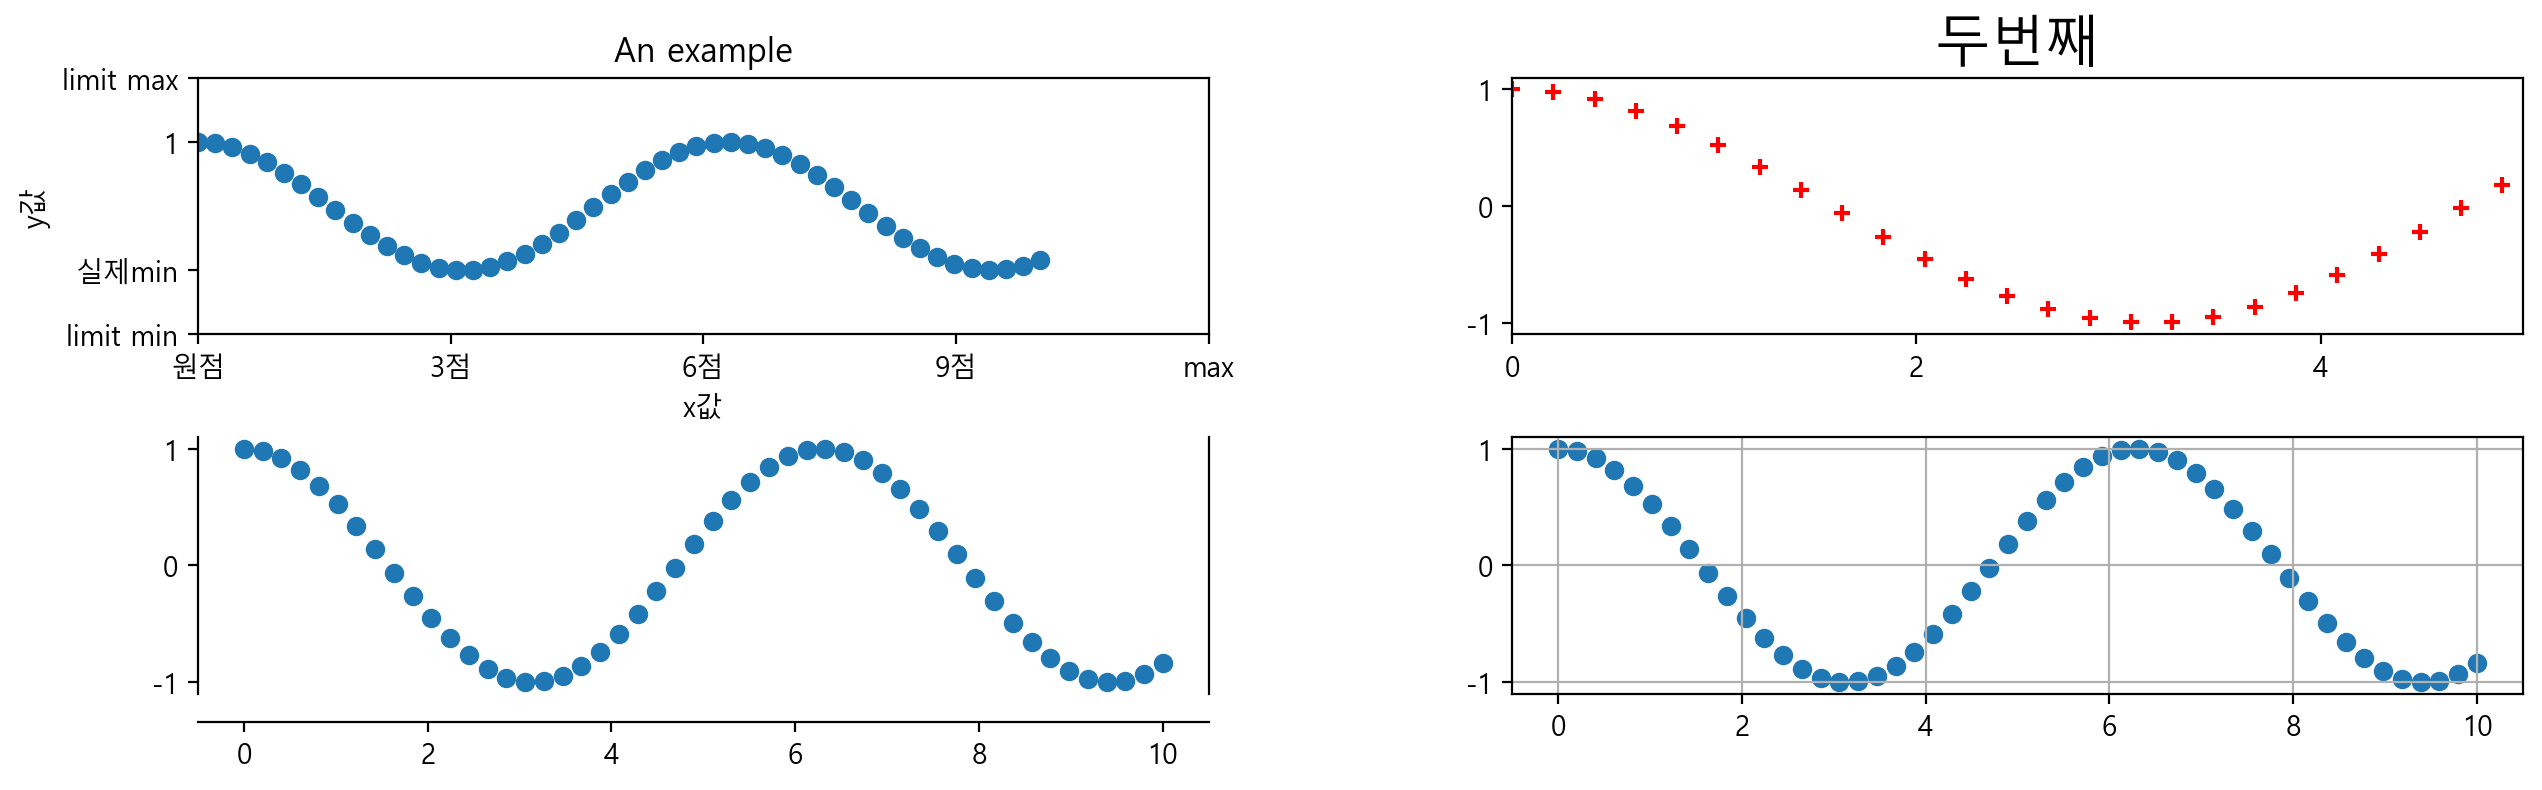

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,4))
# subplot 사이의 여백 조정(title, x축 label)
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace(위 아래 여백, 1은 subplot의 높이)
                                            # wspace(좌우 여백, 1은 subplot의 너비)
axes[0,0].scatter(x,y)
axes[0,0].set(title='An example',
              ylabel='y값', xlabel='x값',
              xlim=[0,12], # x축 눈금 범위
              xticks=[0,3,6,9,12], # x축 눈금
              xticklabels=['원점','3점','6점','9점','max'],
              ylim=[-2,2],
              yticks=[-2,-1,1,2],
              yticklabels=['limit min','실제min',1,'limit max']
             )
axes[0,1].scatter(x,y,color='r',marker='+')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim([0,5])
axes[0,1].set_xticks(range(0,6,2))
axes[1,0].scatter(x,y)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position(('outward', 10)) # 10만큼 바깥쪽으로 이동
axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()

### 5) 축 공유 ★

In [93]:
x = np.arange(0, 10)
y1 = 0.5*x **2
y2 = -y1

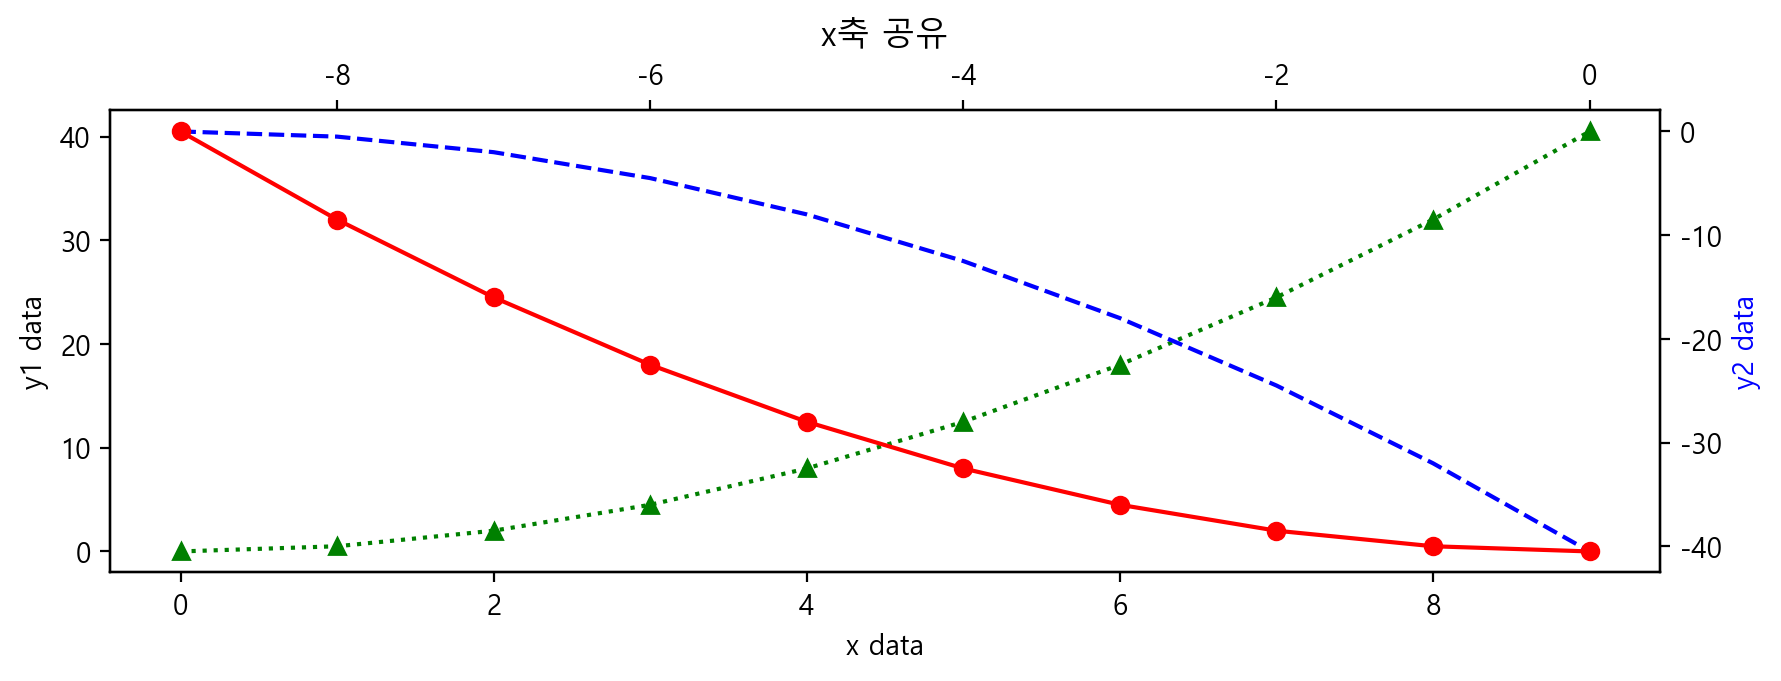

In [105]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x,y1, 'g^:')
ax1.set(title='x축 공유', xlabel='x data', ylabel='y1 data')

ax2=ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x,y2,'b--')
ax2.set_ylabel('y2 data', color='b')

ax3=ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')
plt.show()

### 6) 범례 표시
### 7) plot style 지정

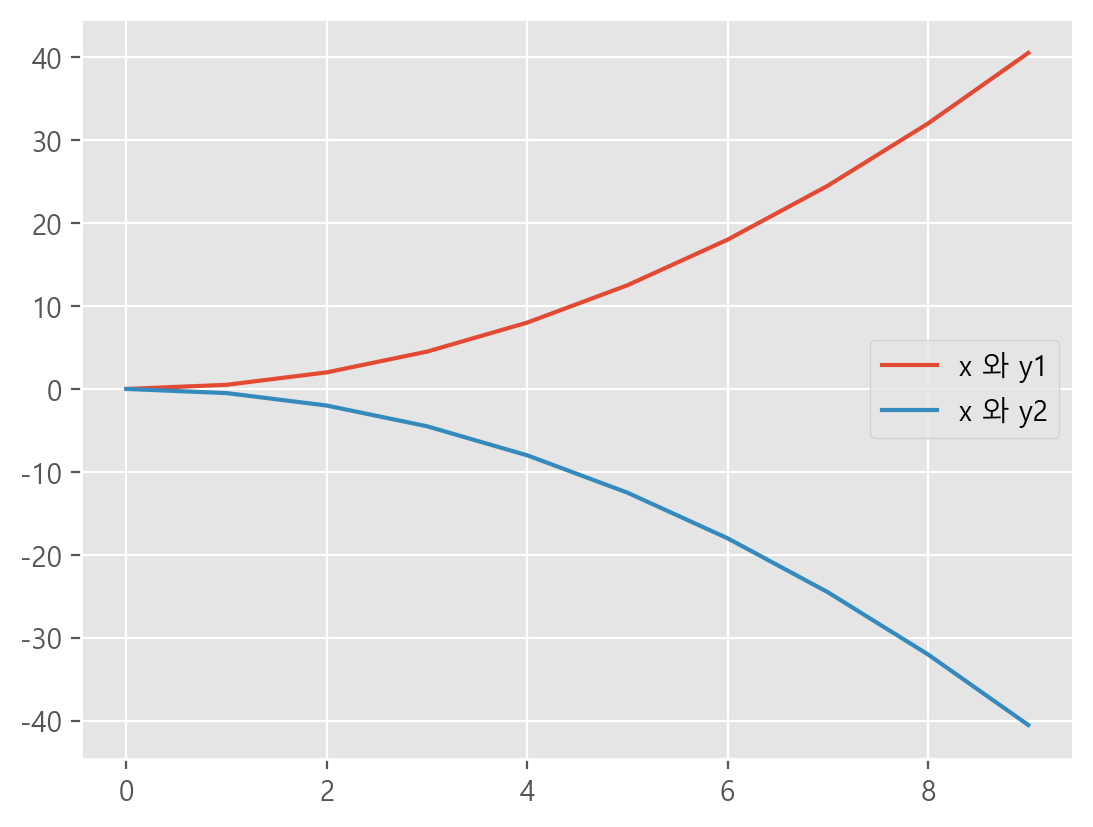

In [111]:
plt.style.use('ggplot') # default, ggplot, classic, ...
plt.plot(x,y1, label='x 와 y1')
plt.plot(x, y2, label='x 와 y2')
plt.legend(loc='center right')
plt.show()